In [129]:
data_dir = "data/raw_training/training_data"

In [130]:
import helpers.input_processor as ip
import helpers.audio_tools as auditools

df = ip.ingestData(data_dir)

print(df.head())


c:\Users\HP User\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Ingesting data from  data/raw_training/training_data
shape: (5, 8)
┌───────┬───────┬────────┬────────┬────────┬──────────┬─────────┬────────────────────┐
│ id    ┆ age   ┆ sex    ┆ height ┆ weight ┆ pregnant ┆ murmur  ┆ audio_files        │
│ ---   ┆ ---   ┆ ---    ┆ ---    ┆ ---    ┆ ---      ┆ ---     ┆ ---                │
│ str   ┆ str   ┆ str    ┆ str    ┆ str    ┆ str      ┆ str     ┆ list [str]         │
╞═══════╪═══════╪════════╪════════╪════════╪══════════╪═════════╪════════════════════╡
│ 13918 ┆ Child ┆ Male   ┆ 98.0   ┆ 15.9   ┆ False    ┆ Present ┆ ["13918_AV.wav",   │
│       ┆       ┆        ┆        ┆        ┆          ┆         ┆ "13918_PV.wav",... │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 14241 ┆ Child ┆ Male   ┆ 87.0   ┆ 11.2   ┆ False    ┆ Present ┆ ["14241_AV.wav",   │
│       ┆       ┆        ┆        ┆        ┆          ┆         ┆ "14241_PV.wav",... │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌

In [152]:
import librosa
from librosa import display
from scipy import signal

def wav_to_spectrogram(wav_file):
    y, sr = librosa.load(wav_file)
    print(y)
    normalized_wav = librosa.util.normalize(y)

    X = librosa.stft(normalized_wav, n_fft=len(y), hop_length=int(max(y)))
    Xdb = librosa.amplitude_to_db(abs(X))
    return Xdb

In [153]:
# loop through the audio files in the data frame
spectrograms = []
for i in range(1):
    # loop through the audio files in the data frame
    spectro_array = []
    for audio_file in df.audio_files[i]:
        spectro_array.append(wav_to_spectrogram(data_dir + "/" + audio_file))
    spectrograms.append(spectro_array)

import matplotlib.pyplot as plt

[-0.0004367  -0.00011859  0.00027535 ...  0.00823203  0.00478874
  0.        ]


MemoryError: Unable to allocate 192. GiB for an array with shape (113426, 226851) and data type complex64

In [ ]:
plt.imshow(spectrograms[0][0])
plt.show()


# remove from 200 to 1000 of the spectrogram height

spec = spectrograms[0][0]
spec = spec[0:200,:]

plt.imshow(spec)

plt.show()




IndexError: list index out of range

In [133]:
import wave
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# # loop through the audio files in the data frame
# spectrograms = []
# for i in range(len(df)):
#     # loop through the audio files in the data frame
#     spectro_array = []
#     for audio_file in df.audio_files[i]:
#         spectro_array.append(auditools.wav_to_spectrogram(data_dir + "/" + audio_file))
#     spectrograms.append(spectro_array)

# import matplotlib.pyplot as plt

In [26]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from librosa import display

def wav_to_spectrogram(wav_file):
    waveform, samp_rate = librosa.load(wav_file, sr=4000) #make sure that the correct sample rate is passed as a parameters. if unspecified, the function chooses some default value
    x = librosa.stft(waveform)
    xDb = librosa.amplitude_to_db(np.abs(x))
    plt.figure(figsize=(14, 5))
    display.specshow(xDb, sr=samp_rate, x_axis='time', y_axis='hz')
    plt.colorbar()

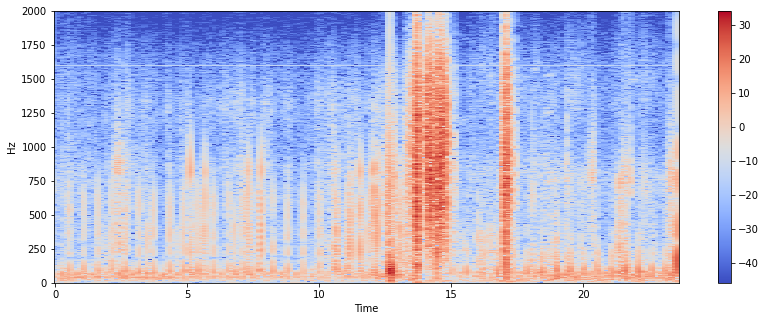

In [27]:
example = data_dir + "/9979_TV.wav"
wav_to_spectrogram(example)